Christopher Moore  
CSE 625 Project 2  
07/02/2023

# Large-scale CelebFaces Attributes Dataset
## Seperating Male and Female Faces

In [1]:
using CSV
male_faces = []
female_faces = []
faces = CSV.File("data\\list_attr_celeba_2.csv")

# Iterate through rows of CSV file
for row in faces
    
    # Check the Male column of the CSV
    if row[:Male] == 1
        push!(male_faces, row[:id]) # Add Male img ID
    else 
        push!(female_faces, row[:id]) # Add Female img ID
    end
end

## Showing Last 3 Male and Female Faces

In [2]:
print("Last 3 Males: ") 
foreach(x -> print(x, " "), last(male_faces, 3)) 
println()
print("Last 3 Females: ") 
foreach(x -> print(x, " "), last(female_faces, 3))

Last 3 Males: 202590.jpg 202596.jpg 202597.jpg

 
Last 3 Females: 202595.jpg 202598.jpg 202599.jpg 

| ![202590.jpg](data/img_align_celeba/202590.jpg) | ![202596.jpg](data/img_align_celeba/202596.jpg) | ![202597.jpg](data/img_align_celeba/202597.jpg) |
| --- | --- | --- |
| 202590.jpg | 202596.jpg | 202597.jpg |

| ![202595.jpg](data/img_align_celeba/202595.jpg) | ![202598.jpg](data/img_align_celeba/202598.jpg) | ![202599.jpg](data/img_align_celeba/202599.jpg) 
| --- | --- | --- |
| 202595.jpg | 202598.jpg | 202599.jpg |

# Computing Male and Female Celeb Faces
## Computer Configuration Info

In [3]:
using Hwloc
println("Physical Cores: ", num_physical_cores())
println("Virtual Cores: ", num_virtual_cores())
println("Cache Size: ", cachesize())
println("Cache Line Size: ", cachelinesize())

Physical Cores: 4
Virtual Cores: 8


Cache Size: (L1 = 32768, L2 = 262144, L3 = 8388608)


Cache Line Size: (L1 = 64, L2 = 64, L3 = 64)


## Computing the Mean Faces

In [4]:
using Images, Colors

In [5]:
const num_faces = 100

100

In [6]:
# Add path to images folder to the image IDs
paths_male = map(x -> joinpath("data\\img_align_celeba", x), male_faces)
paths_female = map(x -> joinpath("data\\img_align_celeba", x), female_faces)
println(length(paths_male), ' ', length(paths_female))

84434 118165


The Images Julia Package is used to get the images into code.  
the load() function reads a file from the given file path

images are represent by a matrix of RGB objects. the dimensions of the matrix is equivalent to the resolution of the picture.  
the type RGB is 3 values from 0 to 1 representing the saturation of the color channel.  
hence N0f8 (Normed Unsigned 8 byte floating point) is used.

In [7]:
# Load an image array from a list of paths
function loadImages(paths)
    images = Vector{Matrix{RGB{N0f8}}}([])
    for (i, f) in enumerate(paths)
        if  i <= num_faces
            push!(images, load(f))
        else
            return images
        end
    end
end

# Load the male and female images
@time images_male = loadImages(paths_male)
@time images_female = loadImages(paths_female)
print()

  0.868927 seconds (1.08 M allocations: 95.300 MiB, 5.62% gc time, 78.22% compilation time: 10% of which was recompilation)


  0.135893 seconds (6.81 k allocations: 23.465 MiB, 14.05% gc time)


The mean_RGB function returns the mean of any number of colors  
The variable c is uses to store the resulting mean and is initalized to all zeroes (black)  
w is the weight of influence each image has on the final (equal to 1 / # of colors to give equal influence to all colors)  
Then for each color (arg in args) the color is scaled by the weight and added to c  
*c is converted to RBG{N0f8} to save space in memory*

In [8]:
function mean_RGB(args...)

    c = RGB{Float64}(0,0,0)    
    w = 1.0 / length(args)
    for arg in args
       c += w * arg
    end
    
    return RGB{N0f8}(c)
end


mean_RGB (generic function with 1 method)

mean_RGB function takes the average of a list of colors.  
In order for the function to work, the dot operator is used to vectorize the function  
So that it can be applied element by element to the RGB Matricies that represent the images.
the splat operator (...) flattens the vector of images to be used as arguments in the function

 31.893687 seconds (378.33 M allocations: 17.139 GiB, 10.58% gc time, 11.18% compilation time)


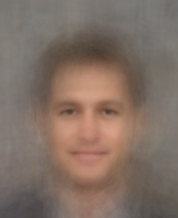

In [9]:
@time mean_male = mean_RGB.(images_male...)
mean_male

 27.193472 seconds (365.42 M allocations: 16.484 GiB, 10.71% gc time, 0.02% compilation time)


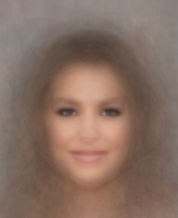

In [10]:
@time mean_female = mean_RGB.(images_female...)
mean_female